### Problem statement : Given the features of the customers of a bank, predict if the customer will leave the bank

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import klib
import tensorflow as tf

In [121]:
df = pd.read_csv("C:/Users/Yash/Downloads/Churn_Modelling/Churn_Modelling.csv", header = 0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [122]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [123]:
df = klib.data_cleaning(df)

Shape of cleaned data: (10000, 14) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.76 MB (-71.03%)



In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   row_number        10000 non-null  int16   
 1   customer_id       10000 non-null  int32   
 2   surname           10000 non-null  string  
 3   credit_score      10000 non-null  int16   
 4   geography         10000 non-null  category
 5   gender            10000 non-null  category
 6   age               10000 non-null  int8    
 7   tenure            10000 non-null  int8    
 8   balance           10000 non-null  float32 
 9   num_of_products   10000 non-null  int8    
 10  has_cr_card       10000 non-null  int8    
 11  is_active_member  10000 non-null  int8    
 12  estimated_salary  10000 non-null  float32 
 13  exited            10000 non-null  int8    
dtypes: category(2), float32(2), int16(2), int32(1), int8(6), string(1)
memory usage: 312.9 KB


## Separating dependent and independent features

In [125]:
X = df.iloc[:,3:13]
y = df.iloc[:, 13]

In [126]:
X.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,619,France,Female,42,2,0.000000,1,1,1,101348.882812
1,608,Spain,Female,41,1,83807.859375,1,0,1,112542.578125
2,502,France,Female,42,8,159660.796875,3,1,0,113931.570312
3,699,France,Female,39,1,0.000000,2,0,0,93826.632812
4,850,Spain,Female,43,2,125510.820312,1,1,1,79084.101562


In [127]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int8

## Handling the categorical values

In [128]:
geography = pd.get_dummies(X['geography'], drop_first = True)
gender = pd.get_dummies(X['gender'], drop_first = True)

In [129]:
X = X.drop(['geography','gender'], axis = 1)

In [130]:
X = pd.concat([X, geography,gender], axis = 1)

## Test-Train Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

## Standardizing the data

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [134]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Creating the ANN

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [136]:
model = Sequential()

In [137]:
model.add(Dense(units = 11, activation ='relu'))
model.add(Dense(units = 7, activation = 'relu'))
model.add(Dense(units = 7, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [138]:

   model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Early Stopping

In [139]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights= False)

In [140]:
model_history = model.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping )

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.5200 - accuracy: 0.7584 - val_loss: 0.4413 - val_accuracy: 0.8008
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8106 - val_loss: 0.4252 - val_accuracy: 0.8058
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8192 - val_loss: 0.4174 - val_accuracy: 0.8201
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8274 - val_loss: 0.4052 - val_accuracy: 0.8217
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3885 - accuracy: 0.8345 - val_loss: 0.3984 - val_accuracy: 0.8232
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8397 - val_loss: 0.3995 - val_accuracy: 0.8254
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8472 - val_loss: 0.3794 - val_accuracy:

In [141]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

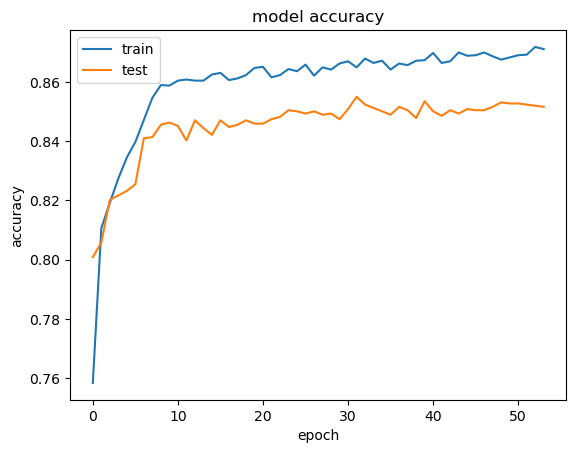

In [142]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [145]:
y_pred = model.predict(X_test)
y_pred =(y_pred >= 0.5) 

63/63 [==============================] - 0s 1ms/step


In [147]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1514,   81],
       [ 196,  209]], dtype=int64)

In [148]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8615

## Summary: We are able to predict whether the person will leave the bank or not with 86.1%  accuracy using ANNs